# Optimisation TD 2


## Méthode de Levenberg-Marquardt

In [1]:
# Imports from the matplotlib library
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
# --------------------------------------

In [39]:
def g(x,a):
    return np.exp(-a*x)

print(g(-1,1))

2.718281828459045


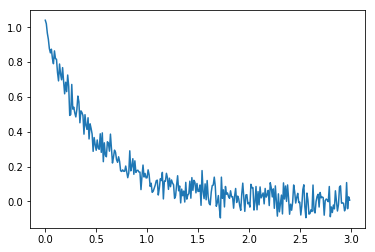

[1.0399104626908715,
 1.0202100278935835,
 0.9659788771306308,
 0.9310361703081197,
 0.8772441633590418,
 0.8527831843588926,
 0.8737140908001487,
 0.8207117419154367,
 0.7905241678917652,
 0.8640961976655301,
 0.8193252532082816,
 0.8165410182923011,
 0.7399261216684108,
 0.692013205428268,
 0.7887004695465515,
 0.730855963572421,
 0.6982383646912633,
 0.7680621346477404,
 0.687423827617695,
 0.6178334730040551,
 0.6841426969622602,
 0.6302712310210036,
 0.7255818733022352,
 0.6608843381831062,
 0.4939350005486108,
 0.4990676570048794,
 0.6715505100613796,
 0.5301841273359642,
 0.540995744010964,
 0.5076542103839997,
 0.48521717869635533,
 0.527415754972251,
 0.604829307785707,
 0.5719196240406612,
 0.451629595249934,
 0.5200281735263714,
 0.5107700593835047,
 0.4925042346689606,
 0.3862871569909603,
 0.4981156564071243,
 0.43640743620808964,
 0.4140938285612426,
 0.4803750575839168,
 0.3587959021880523,
 0.4455892407516143,
 0.41933379822782424,
 0.3867979540696343,
 0.28767046644435

In [40]:
x = np.arange(0,3,0.01)
def yf(x,a,b):

    y = []
    for i in range(len(x)):
        y.append(g(x[i],a) + b*np.random.randn())
    plt.plot(x, y)
    plt.show()
    return y
yf(x, 2,0.05)

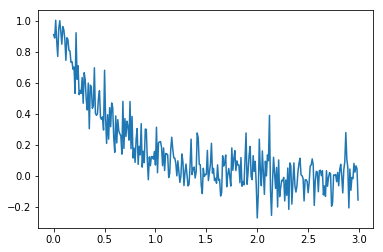

1.5611582772102932

In [41]:
def price(x, y, a):
    res = []
    for i in range(len(x)):
        res.append((y[i] - g(x[i],a))**2)
        
    return 0.5*np.sum(res)

x = np.arange(0,3,0.01)
y = yf(x,2,0.1)
a = 2

price(x,y,a)

In [27]:
def gradient(x, y, a) :
    res = []
    for i in range(len(x)):
        res.append((y[i]-g(x[i],a))*np.exp(-a*x[i])*(-x[i]))
    return -np.sum(res)

gradient(x,y,a)

0.4045452252138328

In [25]:
def Gauss_Newton(x,y,a):
    return np.sum(gradient(x,y,a)*gradient(x,y,a))
    
Gauss_Newton(x,y,a)    

0.001234842902393861

In [31]:
def Levenberg_Marquardt(x, y, niter):
        
    a  = 1.5
    lam = 0.001
    n = 0
    while n < niter :
        grad = gradient(x,y,a)
        sec_dev = Gauss_Newton(x, y, a)
        hlm = sec_dev*(1 + lam)
        dlm = -grad/hlm
        f = price(x, y, a)
        new_f = price(x, y, a + dlm)
        if new_f < f:
            a += dlm
            lam = lam/10
        else:
            lam *= 10
        n += 1
        #print(a, lam)
    return a
                
Levenberg_Marquardt(x,y,100)         
        
    

1.8763348859604667

Étudier l’évolution des paramètres de l’algorithme (λ, norme du gradient, valeur de la f ) au fur et à mesure
des itérations. Commenter.

Faire varier l’amplitude du bruit dans le jeu de données créé (paramètre b). Étudier l’influence sur la
convergence de l’algorithme.

Plus de bruit, plus l'approximation n'est pas précise.

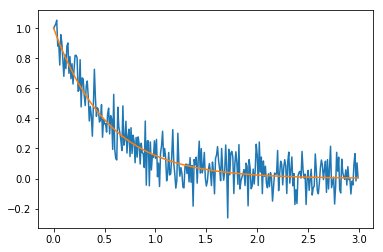

In [32]:
plt.plot(x, y)
plt.plot(x, g(x, Levenberg_Marquardt(x, y, 100)))
plt.show()

## Cas bi-exponentiel

In [43]:
def g(x,a):
    return np.exp(-a[1]*x)*x**a[0]

print(g(-1,[1,1]))

-2.718281828459045


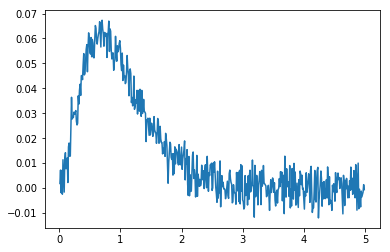

In [65]:
x = np.arange(0.01,5,0.01)
y = yf(x, [2,3], 0.005)
a = [2,3]

In [66]:
price(x,y,a)

0.0060299062038333805

In [87]:
def bi_gradient(x, y, a) :
    df1 = -np.sum((y-g(x,a))*np.log(x)*np.exp(a[0]*np.log(x)-a[1]*x))
    df2 = -np.sum((y-g(x,a))*(-x*x**a[0]*np.exp(-a[1]*x)))
    return [df1,df2]

bi_gradient(x,y,a)

[0.0004016396852546128, 0.0026759290874815173]

In [88]:
def bi_Gauss_Newton(x,y,a):
    d2a1 = np.sum((np.log(x)*np.exp(a[0]*np.log(x)-a[1]*x))**2)
    d2a12 = np.sum((np.log(x)*np.exp(a[0]*np.log(x)-a[1]*x))*(-x*x**a[0]*np.exp(-a[1]*x)))
    d2a2 = np.sum((-x*x**a[0]*np.exp(-a[1]*x))**2)
    return [[d2a1,d2a12],[d2a12,d2a2]]
    
bi_Gauss_Newton(x,y,a)    

[[0.09349203294680572, 0.02202722193930061],
 [0.02202722193930061, 0.2572016151788742]]

In [89]:
def bi_Levenberg_Marquardt(x, y, niter):
        
    a  = [1.5,1.5]
    lam = 0.001
    n = 0
    while n < niter :
        grad = bi_gradient(x,y,a)
        sec_dev = bi_Gauss_Newton(x, y, a)
        
        hlm = [[0,0],[0,0]]
        hlm[0][0] = sec_dev[0][0]*(1 + lam)
        hlm[1][1] = sec_dev[1][1]*(1 + lam)
        hlm[0][1] = sec_dev[0][1] 
        hlm[1][0] = sec_dev[0][1]
        dlm = -np.dot(grad,np.linalg.inv(hlm))
        f = price(x, y, a)
        new_f = price(x, y, a + dlm)
        if new_f < f:
            a += dlm
            lam = lam/10
        else:
            lam *= 10
        n += 1
        #print(a, lam)
    return a
                
bi_Levenberg_Marquardt(x,y,1000)     

array([1.99799349, 2.98988661])

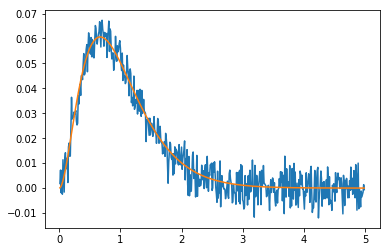

In [90]:
plt.plot(x, y)
plt.plot(x, g(x, bi_Levenberg_Marquardt(x, y, 1000)))
plt.show()